# Credit-Risk-Analysis


In [190]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [191]:
demog_df = pd.read_csv("Demographic data.csv", sep=",")
credbur_df = pd.read_csv("Credit Bureau data.csv", sep=",")

demog_df.info()

credbur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 71295 non-null int64
Age                                            71295 non-null int64
Gender                                         71293 non-null object
Marital Status (at the time of application)    71289 non-null object
No of dependents                               71292 non-null float64
Income                                         71295 non-null float64
Education                                      71176 non-null object
Profession                                     71281 non-null object
Type of residence                              71287 non-null object
No of months in current residence              71295 non-null int64
No of months in current company                71295 non-null int64
Performance Tag                                69870 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 6.5+ MB
<c

In [192]:
demog_df.isnull().sum()

Application ID                                    0
Age                                               0
Gender                                            2
Marital Status (at the time of application)       6
No of dependents                                  3
Income                                            0
Education                                       119
Profession                                       14
Type of residence                                 8
No of months in current residence                 0
No of months in current company                   0
Performance Tag                                1425
dtype: int64

In [193]:
demog_df['Performance Tag'].value_counts(dropna=False)

 0.0    66922
 1.0     2948
NaN      1425
Name: Performance Tag, dtype: int64

In [194]:
credbur_df.isnull().sum()

Application ID                                                        0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                          0
No of times 90 DPD or worse in last 12 months                         0
No of times 60 DPD or worse in last 12 months                         0
No of times 30 DPD or worse in last 12 months                         0
Avgas CC Utilization in last 12 months                             1058
No of trades opened in last 6 months                                  1
No of trades opened in last 12 months                                 0
No of PL trades opened in last 6 months                               0
No of PL trades opened in last 12 months                              0
No of Inquiries in last 6 months (excluding home & auto loans)        0
No of Inquiries in last 12 months (excluding home & auto loans) 

In [195]:
credbur_df['Performance Tag'].value_counts(dropna=False)

 0.0    66922
 1.0     2948
NaN      1425
Name: Performance Tag, dtype: int64

In [196]:
100*(credbur_df['Performance Tag'].sum()/credbur_df['Performance Tag'].count()).round(4)

4.22

Clearly, as we can see above we have `4.22%` customers who ultimately defaulted.

## EDA

### Demographic data

#### Age

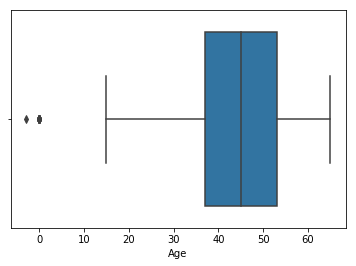

In [197]:
sns.boxplot(x='Age', data=demog_df)
plt.show()

In [198]:
# removing the outliers less than 18 by replacing them with the assumed minimum value of 18 
# as age less than 18 is effectively wrong entry
demog_df['Age'][demog_df['Age']<18] = 18

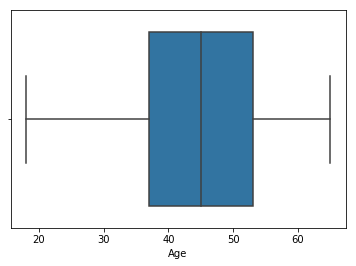

In [199]:
sns.boxplot(x='Age', data=demog_df)
plt.show()

In [200]:
# bucketing the data based on the age to study the default rate
bins = np.arange(10,demog_df['Age'].max() + 10, 10) 
demog_df['Age_bin'] = pd.cut(demog_df['Age'], bins, include_lowest=True)

In [201]:
No_of_prospect = demog_df.groupby('Age_bin')['Performance Tag'].count().reset_index(name = 'noof_prospect')
count_prospects = demog_df[demog_df['Performance Tag']==1].groupby('Age_bin')['Performance Tag'].count().reset_index(name = 'count_prospect')

agg_age = No_of_prospect.merge(count_prospects, on='Age_bin')
agg_age['default_rate'] = 100*(agg_age['count_prospect']/agg_age['noof_prospect']).round(2)

In [202]:
agg_age

,Age_bin,noof_prospect,count_prospect,default_rate
0,"(9.999, 20.0]",141,3,2.0
1,"(20.0, 30.0]",5807,238,4.0
2,"(30.0, 40.0]",18690,831,4.0
3,"(40.0, 50.0]",22872,958,4.0
4,"(50.0, 60.0]",17535,718,4.0
5,"(60.0, 70.0]",4825,200,4.0


The default rate for all the bins is same except for the first age bin which has unmatchable difference in the data proportion.

#### Gender

In [203]:
demog_df['Gender'].value_counts(dropna=False)

M      54456
F      16837
NaN        2
Name: Gender, dtype: int64

In [204]:
# replacing the two missing values with the Mode "M"
demog_df['Gender'].fillna('M', inplace=True)

demog_df['Gender'].value_counts(dropna=False)

M    54458
F    16837
Name: Gender, dtype: int64

In [205]:
count_prospects_gender = demog_df.groupby('Gender')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_gender = demog_df.groupby('Gender')['Performance Tag'].count().reset_index(name = 'noof_prospect')

agg_gender = count_prospects_gender.merge(No_of_prospect_gender, on = 'Gender')
agg_gender['default_rate'] = 100*(agg_gender['count_prospect']/agg_gender['noof_prospect']).round(4)

In [206]:
agg_gender

,Gender,count_prospect,noof_prospect,default_rate
0,F,718.0,16506,4.35
1,M,2230.0,53364,4.18


Again the default rate is similar in terms of Gender as well.

#### Marital Status

In [207]:
demog_df['Marital Status (at the time of application)'].value_counts(dropna=False)

Married    60730
Single     10559
NaN            6
Name: Marital Status (at the time of application), dtype: int64

In [208]:
# replacing the six missing values with the Mode "Married"
demog_df['Marital Status (at the time of application)'].fillna('Married', inplace=True)

demog_df['Marital Status (at the time of application)'].value_counts(dropna=False)

Married    60736
Single     10559
Name: Marital Status (at the time of application), dtype: int64

In [209]:
count_prospects_ms = demog_df.groupby('Marital Status (at the time of application)')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_ms = demog_df.groupby('Marital Status (at the time of application)')['Performance Tag'].count().reset_index(name = 'noof_prospect')

agg_ms = count_prospects_ms.merge(No_of_prospect_ms, on = 'Marital Status (at the time of application)')
agg_ms['default_rate'] = 100*(agg_ms['count_prospect']/agg_ms['noof_prospect']).round(4)

In [210]:
agg_ms

,Marital Status (at the time of application),count_prospect,noof_prospect,default_rate
0,Married,2503.0,59553,4.20
1,Single,445.0,10317,4.31


And so is here. 

#### No of dependents

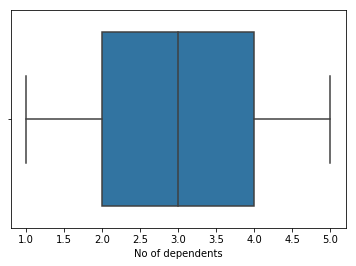

In [211]:
sns.boxplot(x='No of dependents', data=demog_df)
plt.show()

In [212]:
# replacing the three missing values with the 50th percentile '3.0'
demog_df['No of dependents'].fillna(3.0, inplace=True)

demog_df['No of dependents'].isnull().sum()

0

In [213]:
count_prospects_dependents = demog_df.groupby('No of dependents')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_dependents = demog_df.groupby('No of dependents')['Performance Tag'].count().reset_index(name = 'noof_prospect')

agg_dependents = count_prospects_dependents.merge(No_of_prospect_dependents, on = 'No of dependents')
agg_dependents['default_rate'] = 100*(agg_dependents['count_prospect']/agg_dependents['noof_prospect']).round(4)

In [214]:
agg_dependents

,No of dependents,count_prospect,noof_prospect,default_rate
0,1.0,667.0,15218,4.38
1,2.0,588.0,15128,3.89
2,3.0,695.0,15648,4.44
3,4.0,494.0,12000,4.12
4,5.0,504.0,11876,4.24


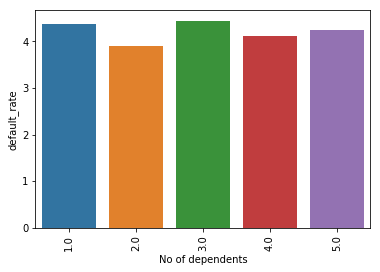

In [215]:
bp = sns.barplot(x='No of dependents', y='default_rate', data=agg_dependents)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

Although not much that could be discovered, but people with 1 or 3 dependents seems to default more than others where the data distribution is almost similar throughout the different categories.

#### Income

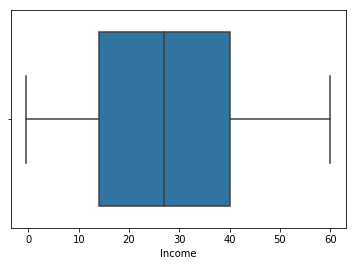

In [216]:
sns.boxplot(x='Income', data=demog_df)
plt.show()

In [217]:
# bucketing the data based on the income to study the default rate
bins = np.arange(0,demog_df['Income'].max() + 10, 10) 
demog_df['Income_bin'] = pd.cut(demog_df['Income'], bins, include_lowest=True)

In [218]:
No_of_prospect_income = demog_df.groupby('Income_bin')['Performance Tag'].count().reset_index(name = 'noof_prospect')
count_prospects_income = demog_df[demog_df['Performance Tag']==1].groupby('Income_bin')['Performance Tag'].count().reset_index(name = 'count_prospect')

agg_income = No_of_prospect_income.merge(count_prospects_income, on='Income_bin')
agg_income['default_rate'] = 100*(agg_income['count_prospect']/agg_income['noof_prospect']).round(3)

In [219]:
agg_income

,Income_bin,noof_prospect,count_prospect,default_rate
0,"(-0.001, 10.0]",12761,711,5.6
1,"(10.0, 20.0]",13349,604,4.5
2,"(20.0, 30.0]",13587,601,4.4
3,"(30.0, 40.0]",13636,485,3.6
4,"(40.0, 50.0]",10844,384,3.5
5,"(50.0, 60.0]",5612,161,2.9


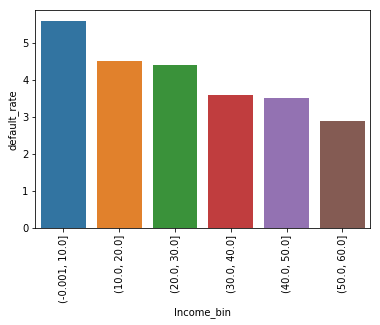

In [220]:
bp = sns.barplot(x='Income_bin', y='default_rate', data=agg_income)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

So, this is very evident and obvious from the above plot that lesser the income of a person, higher the probability of default.

#### Education

In [221]:
demog_df['Education'].value_counts(dropna=False)

Professional    24839
Masters         23970
Bachelor        17697
Phd              4549
Others            121
NaN               119
Name: Education, dtype: int64

In [222]:
count_prospects_education = demog_df.groupby('Education')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_education = demog_df.groupby('Education')['Performance Tag'].count().reset_index(name = 'noof_prospect')

agg_education = count_prospects_education.merge(No_of_prospect_education, on = 'Education')
agg_education['default_rate'] = 100*(agg_education['count_prospect']/agg_education['noof_prospect']).round(3)

In [223]:
agg_education

,Education,count_prospect,noof_prospect,default_rate
0,Bachelor,742.0,17302,4.3
1,Masters,998.0,23481,4.3
2,Others,8.0,119,6.7
3,Phd,184.0,4464,4.1
4,Professional,1011.0,24386,4.1


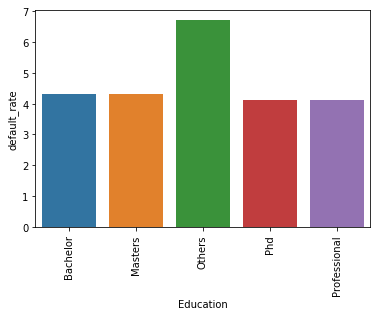

In [224]:
bp = sns.barplot(x='Education', y='default_rate', data=agg_education)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

Assuming that the `Others` class stands for those who have below Graduate degree; people with below Graduate level education are most likely to default as compared to the Graduate and above.

#### Profession

In [225]:
demog_df['Profession '].value_counts(dropna=False)

SAL        40439
SE_PROF    16535
SE         14307
NaN           14
Name: Profession , dtype: int64

In [226]:
# replacing the fourteen missing values with the Mode "SAL"
demog_df['Profession '].fillna('SAL', inplace=True)

demog_df['Profession '].value_counts(dropna=False)

SAL        40453
SE_PROF    16535
SE         14307
Name: Profession , dtype: int64

In [227]:
count_prospects_profession = demog_df.groupby('Profession ')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_profession = demog_df.groupby('Profession ')['Performance Tag'].count().reset_index(name = 'noof_prospect')

agg_profession = count_prospects_profession.merge(No_of_prospect_profession, on = 'Profession ')
agg_profession['default_rate'] = 100*(agg_profession['count_prospect']/agg_profession['noof_prospect']).round(3)

In [228]:
agg_profession

,Profession,count_prospect,noof_prospect,default_rate
0,SAL,1629.0,39687,4.1
1,SE,642.0,13927,4.6
2,SE_PROF,677.0,16256,4.2


Profession again doesn't seems to determine the default.

#### Type of residence

In [229]:
demog_df['Type of residence'].value_counts(dropna=False)

Rented                 53397
Owned                  14243
Living with Parents     1818
Company provided        1630
Others                   199
NaN                        8
Name: Type of residence, dtype: int64

In [230]:
# replacing the eight missing values with the Mode "Rented"
demog_df['Type of residence'].fillna('Rented', inplace=True)

demog_df['Type of residence'].value_counts(dropna=False)

Rented                 53405
Owned                  14243
Living with Parents     1818
Company provided        1630
Others                   199
Name: Type of residence, dtype: int64

In [231]:
count_prospects_residence = demog_df.groupby('Type of residence')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_residence = demog_df.groupby('Type of residence')['Performance Tag'].count().reset_index(name = 'noof_prospect')

agg_residence = count_prospects_residence.merge(No_of_prospect_residence, on = 'Type of residence')
agg_residence['default_rate'] = 100*(agg_residence['count_prospect']/agg_residence['noof_prospect']).round(3)

In [232]:
agg_residence

,Type of residence,count_prospect,noof_prospect,default_rate
0,Company provided,73.0,1603,4.6
1,Living with Parents,80.0,1778,4.5
2,Others,5.0,198,2.5
3,Owned,593.0,14003,4.2
4,Rented,2197.0,52288,4.2


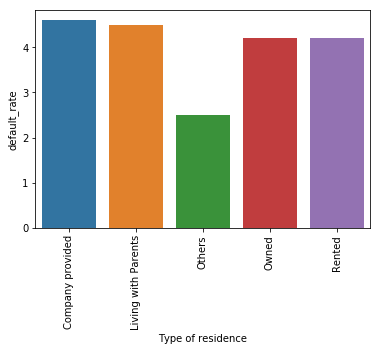

In [233]:
bp = sns.barplot(x='Type of residence', y='default_rate', data=agg_residence)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

#### No of months in current residence

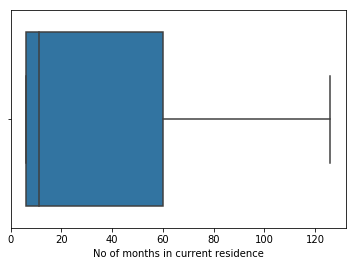

In [234]:
sns.boxplot(x='No of months in current residence', data=demog_df)
plt.show()

In [235]:
# bucketing the data based on the current residence duration to study the default rate
bins = np.arange(0,demog_df['No of months in current residence'].max() + 10, 12) 
demog_df['Residence_bin'] = pd.cut(demog_df['No of months in current residence'], bins, include_lowest=True)

In [236]:
No_of_prospect_resdur = demog_df.groupby('Residence_bin')['Performance Tag'].count().reset_index(name = 'noof_prospect')
count_prospects_resdur = demog_df[demog_df['Performance Tag']==1].groupby('Residence_bin')['Performance Tag'].count().reset_index(name = 'count_prospect')

agg_resdur = No_of_prospect_resdur.merge(count_prospects_resdur, on='Residence_bin')
agg_resdur['default_rate'] = 100*(agg_resdur['count_prospect']/agg_resdur['noof_prospect']).round(3)

In [237]:
agg_resdur

,Residence_bin,noof_prospect,count_prospect,default_rate
0,"(-0.001, 12.0]",35855,1217,3.4
1,"(12.0, 24.0]",4399,283,6.4
2,"(24.0, 36.0]",4183,263,6.3
3,"(36.0, 48.0]",4074,216,5.3
4,"(48.0, 60.0]",3823,210,5.5
5,"(60.0, 72.0]",3483,146,4.2
6,"(72.0, 84.0]",3401,173,5.1
7,"(84.0, 96.0]",3272,145,4.4
8,"(96.0, 108.0]",3412,133,3.9
9,"(108.0, 120.0]",3049,112,3.7


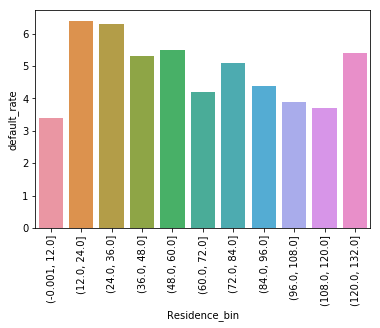

In [238]:
bp = sns.barplot(x='Residence_bin', y='default_rate', data=agg_resdur)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

People living in their current residence for more than 1 year and under 3 years are most likely to default as per the output above.

#### No of months in current company

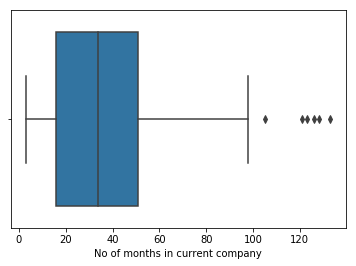

In [239]:
sns.boxplot(x='No of months in current company', data=demog_df)
plt.show()

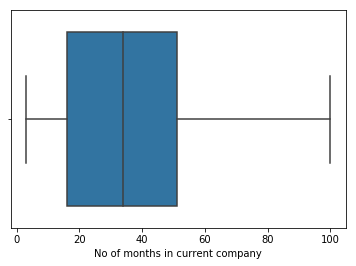

In [240]:
# putting the people who are beyond 100 months old in their current company to 100 months, 
# as there shuld not be much difference in the behaviour of people who are employed for 100+ months with their current employer
demog_df['No of months in current company'][demog_df['No of months in current company']>100] = 100

sns.boxplot(x='No of months in current company', data=demog_df)
plt.show()

In [241]:
# bucketing the data based on the current employment duration to study the default rate
bins = np.arange(0,demog_df['No of months in current company'].max() + 10, 12) 
demog_df['Employment_bin'] = pd.cut(demog_df['No of months in current company'], bins, include_lowest=True)

In [242]:
No_of_prospect_empdur = demog_df.groupby('Employment_bin')['Performance Tag'].count().reset_index(name = 'noof_prospect')
count_prospects_empdur = demog_df[demog_df['Performance Tag']==1].groupby('Employment_bin')['Performance Tag'].count().reset_index(name = 'count_prospect')

agg_empdur = No_of_prospect_empdur.merge(count_prospects_empdur, on='Employment_bin')
agg_empdur['default_rate'] = 100*(agg_empdur['count_prospect']/agg_empdur['noof_prospect']).round(3)

In [243]:
agg_empdur

,Employment_bin,noof_prospect,count_prospect,default_rate
0,"(-0.001, 12.0]",13488,649,4.8
1,"(12.0, 24.0]",11872,572,4.8
2,"(24.0, 36.0]",12108,503,4.2
3,"(36.0, 48.0]",12427,476,3.8
4,"(48.0, 60.0]",12106,402,3.3
5,"(60.0, 72.0]",6547,288,4.4
6,"(72.0, 84.0]",1313,58,4.4
7,"(84.0, 96.0]",2,0,0.0
8,"(96.0, 108.0]",7,0,0.0


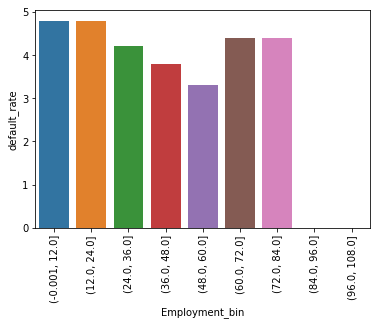

In [244]:
bp = sns.barplot(x='Employment_bin', y='default_rate', data=agg_empdur)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

Although the data distribution among the bins is not ideal, but one inference that could be drawn from the above plot is that `the people who are working in their current organisation for upto 2 years are most likely to default`.

### Credit bureau data

#### No of times 90 DPD or worse in last 6 months

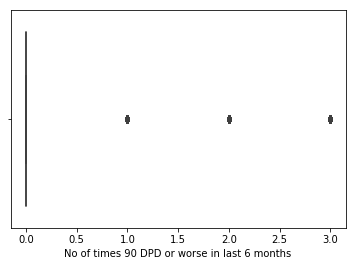

In [245]:
sns.boxplot(x='No of times 90 DPD or worse in last 6 months', data=credbur_df)
plt.show()

In [246]:
credbur_df['No of times 90 DPD or worse in last 6 months'].value_counts(dropna=False)

0    54869
1    13874
2     2258
3      294
Name: No of times 90 DPD or worse in last 6 months, dtype: int64

In [247]:
count_prospects_90DPD6M = credbur_df.groupby('No of times 90 DPD or worse in last 6 months')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_90DPD6M = credbur_df.groupby('No of times 90 DPD or worse in last 6 months')['Performance Tag'].count().reset_index(name = 'noof_prospect')

agg_90DPD6M = count_prospects_90DPD6M.merge(No_of_prospect_90DPD6M, on = 'No of times 90 DPD or worse in last 6 months')
agg_90DPD6M['default_rate'] = 100*(agg_90DPD6M['count_prospect']/agg_90DPD6M['noof_prospect']).round(3)

In [248]:
agg_90DPD6M

,No of times 90 DPD or worse in last 6 months,count_prospect,noof_prospect,default_rate
0,0,1794.0,54666,3.3
1,1,971.0,13220,7.3
2,2,160.0,1776,9.0
3,3,23.0,208,11.1


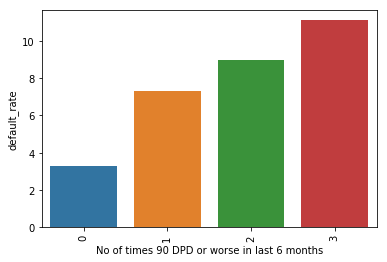

In [249]:
bp = sns.barplot(x='No of times 90 DPD or worse in last 6 months', y='default_rate', data=agg_90DPD6M)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

As expected, more the frequency of payments delay more likelihood of dafault.

#### No of times 60 DPD or worse in last 6 months

In [250]:
credbur_df['No of times 60 DPD or worse in last 6 months'].value_counts(dropna=False)

0    51923
1    11395
2     5412
3     1876
4      597
5       92
Name: No of times 60 DPD or worse in last 6 months, dtype: int64

In [251]:
count_prospects_60DPD6M = credbur_df.groupby('No of times 60 DPD or worse in last 6 months')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_60DPD6M = credbur_df.groupby('No of times 60 DPD or worse in last 6 months')['Performance Tag'].count().reset_index(name = 'noof_prospect')

agg_60DPD6M = count_prospects_60DPD6M.merge(No_of_prospect_60DPD6M, on = 'No of times 60 DPD or worse in last 6 months')
agg_60DPD6M['default_rate'] = 100*(agg_60DPD6M['count_prospect']/agg_60DPD6M['noof_prospect']).round(3)

In [252]:
agg_60DPD6M

,No of times 60 DPD or worse in last 6 months,count_prospect,noof_prospect,default_rate
0,0,1582.0,51871,3.0
1,1,784.0,11132,7.0
2,2,389.0,4917,7.9
3,3,148.0,1469,10.1
4,4,39.0,411,9.5
5,5,6.0,70,8.6


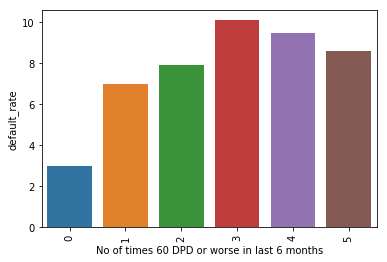

In [253]:
bp = sns.barplot(x='No of times 60 DPD or worse in last 6 months', y='default_rate', data=agg_60DPD6M)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

#### No of times 30 DPD or worse in last 6 months

In [254]:
credbur_df['No of times 30 DPD or worse in last 6 months'].value_counts(dropna=False)

0    50109
1     9610
2     6195
3     3269
4     1389
5      565
6      142
7       16
Name: No of times 30 DPD or worse in last 6 months, dtype: int64

In [255]:
count_prospects_30DPD6M = credbur_df.groupby('No of times 30 DPD or worse in last 6 months')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_30DPD6M = credbur_df.groupby('No of times 30 DPD or worse in last 6 months')['Performance Tag'].count().reset_index(name = 'noof_prospect')

agg_30DPD6M = count_prospects_30DPD6M.merge(No_of_prospect_30DPD6M, on = 'No of times 30 DPD or worse in last 6 months')
agg_30DPD6M['default_rate'] = 100*(agg_30DPD6M['count_prospect']/agg_30DPD6M['noof_prospect']).round(3)

In [256]:
agg_30DPD6M

,No of times 30 DPD or worse in last 6 months,count_prospect,noof_prospect,default_rate
0,0,1455.0,50099,2.9
1,1,623.0,9501,6.6
2,2,466.0,5898,7.9
3,3,245.0,2830,8.7
4,4,107.0,1045,10.2
5,5,43.0,386,11.1
6,6,8.0,96,8.3
7,7,1.0,15,6.7


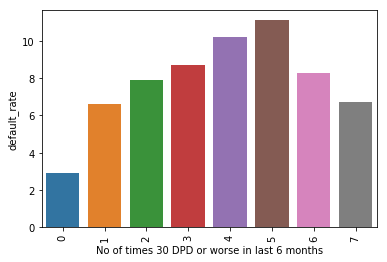

In [257]:
bp = sns.barplot(x='No of times 30 DPD or worse in last 6 months', y='default_rate', data=agg_30DPD6M)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

#### No of times 90 DPD or worse in last 12 months

In [258]:
credbur_df['No of times 90 DPD or worse in last 12 months'].value_counts(dropna=False)

0    50541
1    11991
2     6655
3     1672
4      390
5       46
Name: No of times 90 DPD or worse in last 12 months, dtype: int64

In [259]:
count_prospects_90DPD12M = credbur_df.groupby('No of times 90 DPD or worse in last 12 months')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_90DPD12M = credbur_df.groupby('No of times 90 DPD or worse in last 12 months')['Performance Tag'].count().reset_index(name = 'noof_prospect')

agg_90DPD12M = count_prospects_90DPD12M.merge(No_of_prospect_90DPD12M, on = 'No of times 90 DPD or worse in last 12 months')
agg_90DPD12M['default_rate'] = 100*(agg_90DPD12M['count_prospect']/agg_90DPD12M['noof_prospect']).round(3)

In [260]:
agg_90DPD12M

,No of times 90 DPD or worse in last 12 months,count_prospect,noof_prospect,default_rate
0,0,1510.0,50494,3.0
1,1,796.0,11663,6.8
2,2,489.0,6161,7.9
3,3,120.0,1244,9.6
4,4,28.0,272,10.3
5,5,5.0,36,13.9


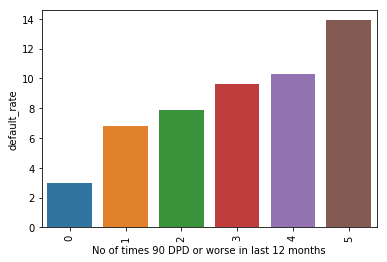

In [261]:
bp = sns.barplot(x='No of times 90 DPD or worse in last 12 months', y='default_rate', data=agg_90DPD12M)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

#### No of times 60 DPD or worse in last 12 months

In [262]:
credbur_df['No of times 60 DPD or worse in last 12 months'].value_counts(dropna=False)

0    45881
1    12927
2     6697
3     3643
4     1420
5      569
6      148
7       10
Name: No of times 60 DPD or worse in last 12 months, dtype: int64

In [263]:
count_prospects_60DPD12M = credbur_df.groupby('No of times 60 DPD or worse in last 12 months')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_60DPD12M = credbur_df.groupby('No of times 60 DPD or worse in last 12 months')['Performance Tag'].count().reset_index(name = 'noof_prospect')

agg_60DPD12M = count_prospects_60DPD12M.merge(No_of_prospect_60DPD12M, on = 'No of times 60 DPD or worse in last 12 months')
agg_60DPD12M['default_rate'] = 100*(agg_60DPD12M['count_prospect']/agg_60DPD12M['noof_prospect']).round(3)

In [264]:
agg_60DPD12M

,No of times 60 DPD or worse in last 12 months,count_prospect,noof_prospect,default_rate
0,0,1378.0,45869,3.0
1,1,663.0,12816,5.2
2,2,483.0,6416,7.5
3,3,274.0,3205,8.5
4,4,101.0,1048,9.6
5,5,36.0,398,9.0
6,6,13.0,111,11.7
7,7,0.0,7,0.0


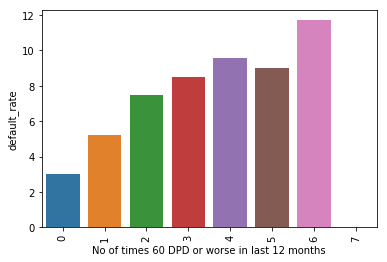

In [265]:
bp = sns.barplot(x='No of times 60 DPD or worse in last 12 months', y='default_rate', data=agg_60DPD12M)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

#### No of times 30 DPD or worse in last 12 months

In [266]:
credbur_df['No of times 30 DPD or worse in last 12 months'].value_counts(dropna=False)

0    44863
1    11502
2     6266
3     4451
4     2309
5     1166
6      549
7      160
8       27
9        2
Name: No of times 30 DPD or worse in last 12 months, dtype: int64

In [267]:
count_prospects_30DPD12M = credbur_df.groupby('No of times 30 DPD or worse in last 12 months')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_30DPD12M = credbur_df.groupby('No of times 30 DPD or worse in last 12 months')['Performance Tag'].count().reset_index(name = 'noof_prospect')

agg_30DPD12M = count_prospects_30DPD12M.merge(No_of_prospect_30DPD12M, on = 'No of times 30 DPD or worse in last 12 months')
agg_30DPD12M['default_rate'] = 100*(agg_30DPD12M['count_prospect']/agg_30DPD12M['noof_prospect']).round(3)

In [268]:
agg_30DPD12M

,No of times 30 DPD or worse in last 12 months,count_prospect,noof_prospect,default_rate
0,0,1316.0,44858,2.9
1,1,518.0,11474,4.5
2,2,452.0,6117,7.4
3,3,349.0,4137,8.4
4,4,173.0,1924,9.0
5,5,89.0,853,10.4
6,6,38.0,376,10.1
7,7,11.0,107,10.3
8,8,2.0,23,8.7
9,9,0.0,1,0.0


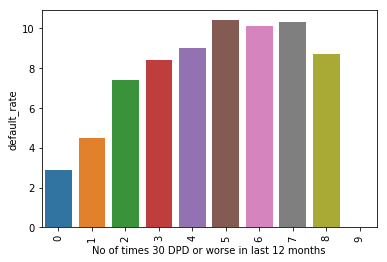

In [269]:
bp = sns.barplot(x='No of times 30 DPD or worse in last 12 months', y='default_rate', data=agg_30DPD12M)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

#### Avgas CC Utilization in last 12 months

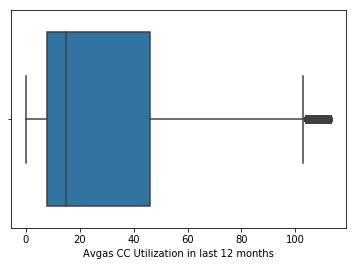

In [270]:
sns.boxplot(x='Avgas CC Utilization in last 12 months', data=credbur_df)
plt.show()

In [271]:
# bucketing the data based on the card utilization in last 1 year to study the default rate
bins = np.arange(0,credbur_df['Avgas CC Utilization in last 12 months'].max() + 10, 20) 
credbur_df['CCUtil_bin'] = pd.cut(credbur_df['Avgas CC Utilization in last 12 months'], bins, include_lowest=True)

In [272]:
No_of_prospect_ccutil = credbur_df.groupby('CCUtil_bin')['Performance Tag'].count().reset_index(name = 'noof_prospect')
count_prospects_ccutil = credbur_df[demog_df['Performance Tag']==1].groupby('CCUtil_bin')['Performance Tag'].count().reset_index(name = 'count_prospect')

agg_ccutil = No_of_prospect_ccutil.merge(count_prospects_ccutil, on='CCUtil_bin')
agg_ccutil['default_rate'] = 100*(agg_ccutil['count_prospect']/agg_ccutil['noof_prospect']).round(3)

In [273]:
agg_ccutil

,CCUtil_bin,noof_prospect,count_prospect,default_rate
0,"(-0.001, 20.0]",40232,977,2.4
1,"(20.0, 40.0]",9173,589,6.4
2,"(40.0, 60.0]",9033,664,7.4
3,"(60.0, 80.0]",5131,385,7.5
4,"(80.0, 100.0]",1653,107,6.5
5,"(100.0, 120.0]",3625,178,4.9


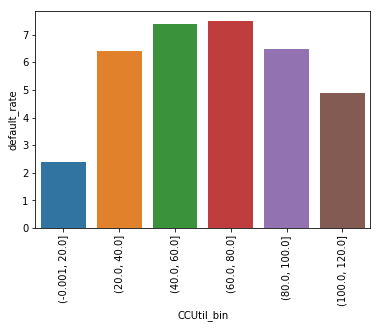

In [274]:
bp = sns.barplot(x='CCUtil_bin', y='default_rate', data=agg_ccutil)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

People utilising more than 40% and upto 80% of their credit limit are most likely to default.

#### No of trades opened in last 6 months

In [275]:
credbur_df['No of trades opened in last 6 months'].value_counts(dropna=False)

 1.0     20251
 2.0     12462
 0.0     12231
 3.0      9851
 4.0      6624
 5.0      3791
 6.0      2349
 7.0      1649
 8.0      1154
 9.0       618
 10.0      238
 11.0       65
 12.0       11
NaN          1
Name: No of trades opened in last 6 months, dtype: int64

In [276]:
# imputing the single NULL value with the Mode '1.0'
credbur_df['No of trades opened in last 6 months'].fillna(1.0, inplace=True)

credbur_df['No of trades opened in last 6 months'].value_counts(dropna=False)

1.0     20252
2.0     12462
0.0     12231
3.0      9851
4.0      6624
5.0      3791
6.0      2349
7.0      1649
8.0      1154
9.0       618
10.0      238
11.0       65
12.0       11
Name: No of trades opened in last 6 months, dtype: int64

In [277]:
count_prospects_TRD6M = credbur_df.groupby('No of trades opened in last 6 months')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_TRD6M = credbur_df.groupby('No of trades opened in last 6 months')['Performance Tag'].count().reset_index(name = 'noof_prospect')

agg_TRD6M = count_prospects_TRD6M.merge(No_of_prospect_TRD6M, on = 'No of trades opened in last 6 months')
agg_TRD6M['default_rate'] = 100*(agg_TRD6M['count_prospect']/agg_TRD6M['noof_prospect']).round(3)

In [278]:
agg_TRD6M

,No of trades opened in last 6 months,count_prospect,noof_prospect,default_rate
0,0.0,272.0,12194,2.2
1,1.0,534.0,20123,2.7
2,2.0,639.0,12117,5.3
3,3.0,599.0,9403,6.4
4,4.0,436.0,6297,6.9
5,5.0,212.0,3665,5.8
6,6.0,109.0,2336,4.7
7,7.0,65.0,1649,3.9
8,8.0,52.0,1154,4.5
9,9.0,21.0,618,3.4


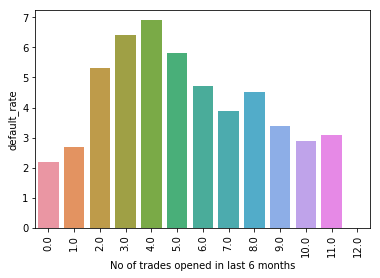

In [279]:
bp = sns.barplot(x='No of trades opened in last 6 months', y='default_rate', data=agg_TRD6M)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

#### No of trades opened in last 12 months

In [280]:
credbur_df['No of trades opened in last 12 months'].value_counts(dropna=False)

1     11380
2      9342
0      4957
4      4925
3      4713
5      4658
6      4391
7      4303
8      3995
9      3573
10     2994
11     2293
12     1762
13     1406
14     1124
15     1068
16      992
17      860
18      736
19      612
20      434
21      308
22      218
23      121
24       73
25       34
26       11
27        9
28        3
Name: No of trades opened in last 12 months, dtype: int64

In [281]:
count_prospects_TRD12M = credbur_df.groupby('No of trades opened in last 12 months')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_TRD12M = credbur_df.groupby('No of trades opened in last 12 months')['Performance Tag'].count().reset_index(name = 'noof_prospect')

agg_TRD12M = count_prospects_TRD12M.merge(No_of_prospect_TRD12M, on = 'No of trades opened in last 12 months')
agg_TRD12M['default_rate'] = 100*(agg_TRD12M['count_prospect']/agg_TRD12M['noof_prospect']).round(3)

In [282]:
agg_TRD12M

,No of trades opened in last 12 months,count_prospect,noof_prospect,default_rate
0,0,111.0,4956,2.2
1,1,178.0,11377,1.6
2,2,178.0,9323,1.9
3,3,198.0,4679,4.2
4,4,208.0,4850,4.3
5,5,233.0,4548,5.1
6,6,267.0,4207,6.3
7,7,268.0,4091,6.6
8,8,305.0,3799,8.0
9,9,214.0,3376,6.3


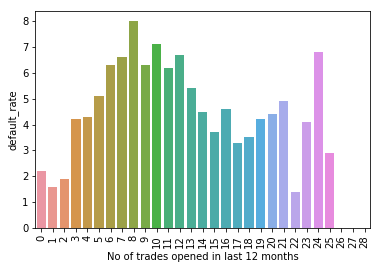

In [283]:
bp = sns.barplot(x='No of trades opened in last 12 months', y='default_rate', data=agg_TRD12M)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

#### No of PL trades opened in last 6 months

In [284]:
credbur_df['No of PL trades opened in last 6 months'].value_counts(dropna=False)

0    31194
1    13854
2    13079
3     8320
4     3462
5     1090
6      296
Name: No of PL trades opened in last 6 months, dtype: int64

In [285]:
count_prospects_PLTRD6M = credbur_df.groupby('No of PL trades opened in last 6 months')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_PLTRD6M = credbur_df.groupby('No of PL trades opened in last 6 months')['Performance Tag'].count().reset_index(name = 'noof_prospect')

agg_PLTRD6M = count_prospects_PLTRD6M.merge(No_of_prospect_PLTRD6M, on = 'No of PL trades opened in last 6 months')
agg_PLTRD6M['default_rate'] = 100*(agg_PLTRD6M['count_prospect']/agg_PLTRD6M['noof_prospect']).round(3)

In [286]:
agg_PLTRD6M

,No of PL trades opened in last 6 months,count_prospect,noof_prospect,default_rate
0,0,699.0,31081,2.2
1,1,692.0,13548,5.1
2,2,803.0,12565,6.4
3,3,501.0,7949,6.3
4,4,197.0,3341,5.9
5,5,48.0,1090,4.4
6,6,8.0,296,2.7


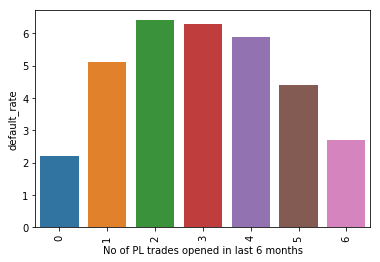

In [287]:
bp = sns.barplot(x='No of PL trades opened in last 6 months', y='default_rate', data=agg_PLTRD6M)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

#### No of PL trades opened in last 12 months

In [288]:
credbur_df['No of PL trades opened in last 12 months'].value_counts(dropna=False)

0     25829
3      8433
4      8273
2      6982
1      6693
5      6485
6      4206
7      2284
8      1178
9       601
10      255
11       66
12       10
Name: No of PL trades opened in last 12 months, dtype: int64

In [289]:
count_prospects_PLTRD12M = credbur_df.groupby('No of PL trades opened in last 12 months')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_PLTRD12M = credbur_df.groupby('No of PL trades opened in last 12 months')['Performance Tag'].count().reset_index(name = 'noof_prospect')

agg_PLTRD12M = count_prospects_PLTRD12M.merge(No_of_prospect_PLTRD12M, on = 'No of PL trades opened in last 12 months')
agg_PLTRD12M['default_rate'] = 100*(agg_PLTRD12M['count_prospect']/agg_PLTRD12M['noof_prospect']).round(3)

In [290]:
agg_PLTRD12M

,No of PL trades opened in last 12 months,count_prospect,noof_prospect,default_rate
0,0,457.0,25825,1.8
1,1,247.0,6641,3.7
2,2,366.0,6830,5.4
3,3,508.0,8131,6.2
4,4,535.0,7904,6.8
5,5,391.0,6189,6.3
6,6,243.0,4023,6.0
7,7,109.0,2223,4.9
8,8,50.0,1172,4.3
9,9,28.0,601,4.7


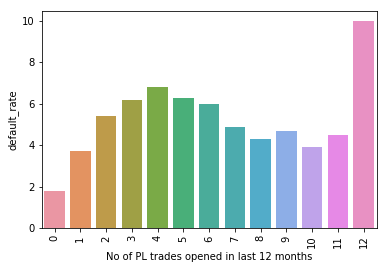

In [291]:
bp = sns.barplot(x='No of PL trades opened in last 12 months', y='default_rate', data=agg_PLTRD12M)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

Therefore, customers who have done `12` PL trades in last 1 year are extremely likely to default.

#### No of Inquiries in last 6 months (excluding home & auto loans)

In [292]:
credbur_df['No of Inquiries in last 6 months (excluding home & auto loans)'].value_counts(dropna=False)

0     25176
1     13513
2     13350
3      7585
4      4385
5      3019
6      1750
7      1149
8       835
9       425
10      108
Name: No of Inquiries in last 6 months (excluding home & auto loans), dtype: int64

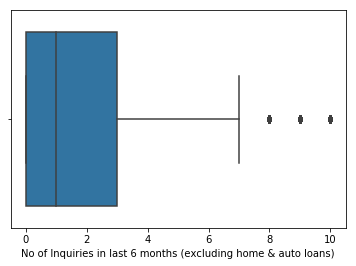

In [293]:
sns.boxplot(x='No of Inquiries in last 6 months (excluding home & auto loans)', data=credbur_df)
plt.show()

In [294]:
count_prospects_INQ6M = credbur_df.groupby('No of Inquiries in last 6 months (excluding home & auto loans)')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_INQ6M = credbur_df.groupby('No of Inquiries in last 6 months (excluding home & auto loans)')['Performance Tag'].count().reset_index(name = 'noof_prospect')

agg_INQ6M = count_prospects_INQ6M.merge(No_of_prospect_INQ6M, on = 'No of Inquiries in last 6 months (excluding home & auto loans)')
agg_INQ6M['default_rate'] = 100*(agg_INQ6M['count_prospect']/agg_INQ6M['noof_prospect']).round(3)

In [295]:
agg_INQ6M

,No of Inquiries in last 6 months (excluding home & auto loans),count_prospect,noof_prospect,default_rate
0,0,527.0,25069,2.1
1,1,659.0,13177,5.0
2,2,665.0,12832,5.2
3,3,517.0,7258,7.1
4,4,269.0,4248,6.3
5,5,150.0,3019,5.0
6,6,73.0,1750,4.2
7,7,40.0,1149,3.5
8,8,33.0,835,4.0
9,9,13.0,425,3.1


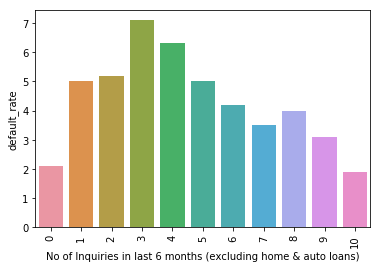

In [296]:
bp = sns.barplot(x='No of Inquiries in last 6 months (excluding home & auto loans)', y='default_rate', data=agg_INQ6M)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

#### No of Inquiries in last 12 months (excluding home & auto loans)

In [297]:
credbur_df['No of Inquiries in last 12 months (excluding home & auto loans)'].value_counts(dropna=False)

0     20593
3      9283
2      8075
4      7491
5      5234
1      3932
6      3767
7      3054
8      2355
9      1777
10     1508
11     1231
12      936
13      789
14      553
15      360
16      212
17       97
18       40
19        6
20        2
Name: No of Inquiries in last 12 months (excluding home & auto loans), dtype: int64

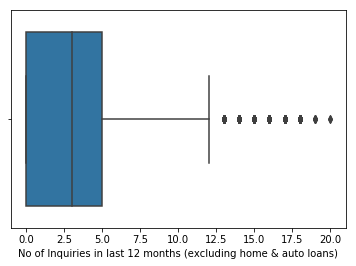

In [298]:
sns.boxplot(x='No of Inquiries in last 12 months (excluding home & auto loans)', data=credbur_df)
plt.show()

In [299]:
count_prospects_INQ12M = credbur_df.groupby('No of Inquiries in last 12 months (excluding home & auto loans)')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_INQ12M = credbur_df.groupby('No of Inquiries in last 12 months (excluding home & auto loans)')['Performance Tag'].count().reset_index(name = 'noof_prospect')

agg_INQ12M = count_prospects_INQ12M.merge(No_of_prospect_INQ12M, on = 'No of Inquiries in last 12 months (excluding home & auto loans)')
agg_INQ12M['default_rate'] = 100*(agg_INQ12M['count_prospect']/agg_INQ12M['noof_prospect']).round(3)

In [300]:
agg_INQ12M

,No of Inquiries in last 12 months (excluding home & auto loans),count_prospect,noof_prospect,default_rate
0,0,307.0,20581,1.5
1,1,155.0,3899,4.0
2,2,382.0,7907,4.8
3,3,444.0,8980,4.9
4,4,380.0,7113,5.3
5,5,362.0,4927,7.3
6,6,247.0,3615,6.8
7,7,209.0,2992,7.0
8,8,141.0,2345,6.0
9,9,71.0,1777,4.0


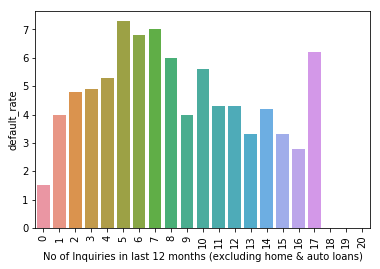

In [301]:
bp = sns.barplot(x='No of Inquiries in last 12 months (excluding home & auto loans)', y='default_rate', data=agg_INQ12M)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

#### Presence of open home loan

In [302]:
credbur_df['Presence of open home loan'].value_counts(dropna=False)

 0.0    52811
 1.0    18212
NaN       272
Name: Presence of open home loan, dtype: int64

In [303]:
count_prospects_HL = credbur_df.groupby('Presence of open home loan')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_HL = credbur_df.groupby('Presence of open home loan')['Performance Tag'].count().reset_index(name = 'noof_prospect')

agg_HL = count_prospects_HL.merge(No_of_prospect_HL, on = 'Presence of open home loan')
agg_HL['default_rate'] = 100*(agg_HL['count_prospect']/agg_HL['noof_prospect']).round(3)

In [304]:
agg_HL

,Presence of open home loan,count_prospect,noof_prospect,default_rate
0,0.0,2333.0,51527,4.5
1,1.0,607.0,18071,3.4


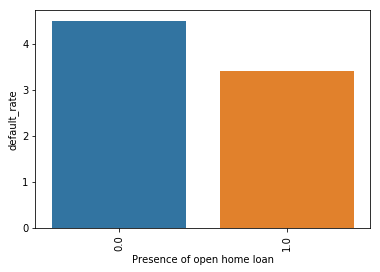

In [305]:
bp = sns.barplot(x='Presence of open home loan', y='default_rate', data=agg_HL)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

#### Outstanding Balance

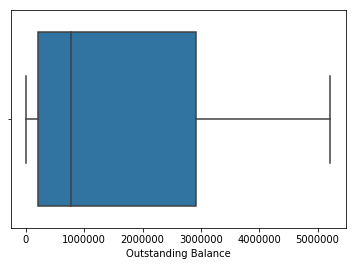

In [306]:
sns.boxplot(x='Outstanding Balance', data=credbur_df)
plt.show()

In [307]:
# bucketing the data based on the outstanding balance on the customer to study the default rate
bins = np.arange(0,credbur_df['Outstanding Balance'].max() + 100000, 500000) 
credbur_df['Obal_bin'] = pd.cut(credbur_df['Outstanding Balance'], bins, include_lowest=True)

In [308]:
No_of_prospect_obal = credbur_df.groupby('Obal_bin')['Performance Tag'].count().reset_index(name = 'noof_prospect')
count_prospects_obal = credbur_df[demog_df['Performance Tag']==1].groupby('Obal_bin')['Performance Tag'].count().reset_index(name = 'count_prospect')

agg_obal = No_of_prospect_obal.merge(count_prospects_obal, on='Obal_bin')
agg_obal['default_rate'] = 100*(agg_obal['count_prospect']/agg_obal['noof_prospect']).round(3)

In [309]:
agg_obal

,Obal_bin,noof_prospect,count_prospect,default_rate
0,"(-0.001, 500000.0]",25172,748,3.0
1,"(500000.0, 1000000.0]",18064,1104,6.1
2,"(1000000.0, 1500000.0]",6533,409,6.3
3,"(1500000.0, 2000000.0]",1664,69,4.1
4,"(2000000.0, 2500000.0]",93,3,3.2
5,"(2500000.0, 3000000.0]",8207,130,1.6
6,"(3000000.0, 3500000.0]",5180,208,4.0
7,"(3500000.0, 4000000.0]",3199,200,6.3
8,"(4000000.0, 4500000.0]",1261,53,4.2
9,"(4500000.0, 5000000.0]",213,14,6.6


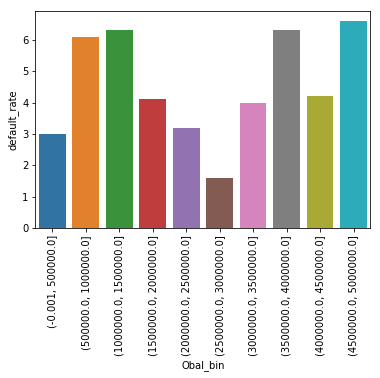

In [310]:
bp = sns.barplot(x='Obal_bin', y='default_rate', data=agg_obal)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

#### Total No of Trades

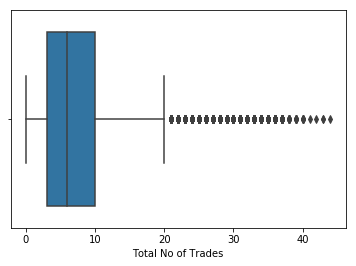

In [311]:
sns.boxplot(x='Total No of Trades', data=credbur_df)
plt.show()

In [312]:
# let's club all the datapoints with Total no of trades >20 as 21, since having more than 20 trades should not change the impact
credbur_df['Total No of Trades'][credbur_df['Total No of Trades']>20] = 21

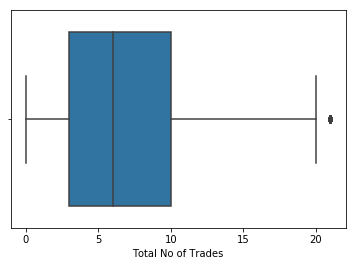

In [313]:
sns.boxplot(x='Total No of Trades', data=credbur_df)
plt.show()

In [314]:
# bucketing the data based on the outstanding balance on the customer to study the default rate
bins = np.arange(0,credbur_df['Total No of Trades'].max() + 5, 5) 
credbur_df['Trades_bin'] = pd.cut(credbur_df['Total No of Trades'], bins, include_lowest=True)

In [315]:
No_of_prospect_trades = credbur_df.groupby('Trades_bin')['Performance Tag'].count().reset_index(name = 'noof_prospect')
count_prospects_trades = credbur_df[demog_df['Performance Tag']==1].groupby('Trades_bin')['Performance Tag'].count().reset_index(name = 'count_prospect')

agg_trades = No_of_prospect_trades.merge(count_prospects_trades, on='Trades_bin')
agg_trades['default_rate'] = 100*(agg_trades['count_prospect']/agg_trades['noof_prospect']).round(3)

In [316]:
agg_trades

,Trades_bin,noof_prospect,count_prospect,default_rate
0,"(-0.001, 5.0]",32499,811,2.5
1,"(5.0, 10.0]",21463,1307,6.1
2,"(10.0, 15.0]",6667,476,7.1
3,"(15.0, 20.0]",2423,84,3.5
4,"(20.0, 25.0]",6818,270,4.0


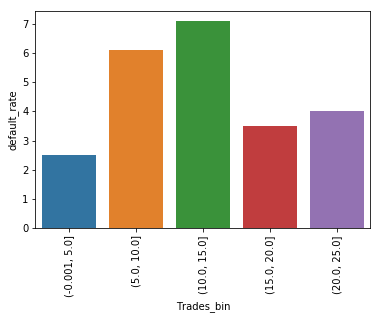

In [317]:
bp = sns.barplot(x='Trades_bin', y='default_rate', data=agg_trades)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

#### Presence of open auto loan

In [318]:
credbur_df['Presence of open auto loan'].value_counts(dropna=False)

0    65262
1     6033
Name: Presence of open auto loan, dtype: int64

In [319]:
count_prospects_AL = credbur_df.groupby('Presence of open auto loan')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_AL = credbur_df.groupby('Presence of open auto loan')['Performance Tag'].count().reset_index(name = 'noof_prospect')

agg_AL = count_prospects_AL.merge(No_of_prospect_AL, on = 'Presence of open auto loan')
agg_AL['default_rate'] = 100*(agg_AL['count_prospect']/agg_AL['noof_prospect']).round(3)

In [320]:
agg_AL

,Presence of open auto loan,count_prospect,noof_prospect,default_rate
0,0,2729.0,63940,4.3
1,1,219.0,5930,3.7


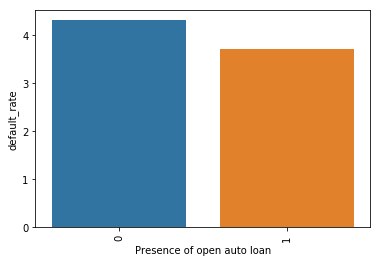

In [321]:
bp = sns.barplot(x='Presence of open auto loan', y='default_rate', data=agg_AL)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

Now, the best way of removing the NULL values of the remaining columns is using WOE, which will also avoid creating the dummy columns.

In [322]:
# checking for how many columns are missing in the three columns with NULL values
credbur_df['Application ID'][credbur_df['Avgas CC Utilization in last 12 months'].isnull() & credbur_df['Presence of open home loan'].isnull() & credbur_df['Outstanding Balance'].isnull()].count()

272

Let's merge the two datasets together, but before that let's check if the Application ID is Unique in both the datasets.

In [323]:
demog_df['Application ID'].is_unique

False

In [324]:
credbur_df['Application ID'].is_unique

False

In [325]:
# find the Application IDs which have duplicate Values
vc1 = demog_df['Application ID'].value_counts()
print(vc1[vc1 > 1])

653287861    2
671989187    2
765011468    2
Name: Application ID, dtype: int64


In [326]:
vc2 = credbur_df['Application ID'].value_counts()
print (vc2[vc2 > 1])

653287861    2
671989187    2
765011468    2
Name: Application ID, dtype: int64


Now, leaving the doubtful data behind we will drop these datapoints.

In [327]:
demog_df.drop(demog_df[demog_df['Application ID'].isin([653287861, 671989187, 765011468])].index, inplace=True)

credbur_df.drop(credbur_df[credbur_df['Application ID'].isin([653287861, 671989187, 765011468])].index, inplace=True)

In [328]:
# merging the two dataframes together
credx_df = demog_df.merge(credbur_df, on = 'Application ID')

credx_df.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,...,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_y,CCUtil_bin,Obal_bin,Trades_bin
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,...,0,0,1.0,2999395.0,4,0,0.0,"(-0.001, 20.0]","(2500000.0, 3000000.0]","(-0.001, 5.0]"
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,...,0,0,0.0,3078.0,5,0,0.0,"(-0.001, 20.0]","(-0.001, 500000.0]","(-0.001, 5.0]"
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,...,0,0,1.0,3004972.0,2,0,0.0,"(-0.001, 20.0]","(3000000.0, 3500000.0]","(-0.001, 5.0]"
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,...,0,0,1.0,3355373.0,4,1,0.0,"(-0.001, 20.0]","(3000000.0, 3500000.0]","(-0.001, 5.0]"
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,...,0,0,1.0,3014283.0,4,0,0.0,"(-0.001, 20.0]","(3000000.0, 3500000.0]","(-0.001, 5.0]"


In [329]:
# checking the rows where Performance tags doesn't match
credx_df.loc[credx_df['Performance Tag_x']!=credx_df['Performance Tag_y'], ['Application ID', 'Performance Tag_x', 'Performance Tag_y']].count()

Application ID       1425
Performance Tag_x       0
Performance Tag_y       0
dtype: int64

Clearly, the datapoints which doesn't have the dependant variable's value would be of no use for the Model building and there are 1425 such points so we will choose to get rid of these for now, while keeping them safe for the future use.

In [330]:
# dropping the duplicate column 
credx_df.drop(columns=['Performance Tag_x'], inplace=True)
print(credx_df.columns.tolist())

['Application ID', 'Age', 'Gender', 'Marital Status (at the time of application)', 'No of dependents', 'Income', 'Education', 'Profession ', 'Type of residence', 'No of months in current residence', 'No of months in current company', 'Age_bin', 'Income_bin', 'Residence_bin', 'Employment_bin', 'No of times 90 DPD or worse in last 6 months', 'No of times 60 DPD or worse in last 6 months', 'No of times 30 DPD or worse in last 6 months', 'No of times 90 DPD or worse in last 12 months', 'No of times 60 DPD or worse in last 12 months', 'No of times 30 DPD or worse in last 12 months', 'Avgas CC Utilization in last 12 months', 'No of trades opened in last 6 months', 'No of trades opened in last 12 months', 'No of PL trades opened in last 6 months', 'No of PL trades opened in last 12 months', 'No of Inquiries in last 6 months (excluding home & auto loans)', 'No of Inquiries in last 12 months (excluding home & auto loans)', 'Presence of open home loan', 'Outstanding Balance', 'Total No of Trades

In [331]:
# renaming the columns to a better format for the ease of coding and understandability
credx_df.columns = ['application_id', 'age', 'gender', 'marital_status', 'noof_dependents', 'income', 'education', 'profession', 'residence_type', 'noof_months_in_current_residence', 'noof_months_in_current_company', 'age_bin', 'income_bin', 'residence_bin', 'employment_bin', '90DPD_6months', '60DPD_6months', '30DPD_6months', '90DPD_12months', '60DPD_12months', '30DPD_12months', 'avg_ccutil_12months', 'trades_opened_6months', 'trades_opened_12months', 'PLtrades_opened_6months', 'PLtrades_opened_12months', 'inquiries_6months', 'inquiries_12months', 'open_homeloan', 'outstanding_balance', 'total_trades', 'open_autoloan', 'defaulted', 'ccutil_bin', 'obal_bin', 'trades_bin']
credx_df.head()

,application_id,age,gender,marital_status,noof_dependents,income,education,profession,residence_type,noof_months_in_current_residence,...,inquiries_6months,inquiries_12months,open_homeloan,outstanding_balance,total_trades,open_autoloan,defaulted,ccutil_bin,obal_bin,trades_bin
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,...,0,0,1.0,2999395.0,4,0,0.0,"(-0.001, 20.0]","(2500000.0, 3000000.0]","(-0.001, 5.0]"
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,...,0,0,0.0,3078.0,5,0,0.0,"(-0.001, 20.0]","(-0.001, 500000.0]","(-0.001, 5.0]"
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,...,0,0,1.0,3004972.0,2,0,0.0,"(-0.001, 20.0]","(3000000.0, 3500000.0]","(-0.001, 5.0]"
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,...,0,0,1.0,3355373.0,4,1,0.0,"(-0.001, 20.0]","(3000000.0, 3500000.0]","(-0.001, 5.0]"
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,...,0,0,1.0,3014283.0,4,0,0.0,"(-0.001, 20.0]","(3000000.0, 3500000.0]","(-0.001, 5.0]"


### Multivariate Analysis

#### Profession + Residence Type

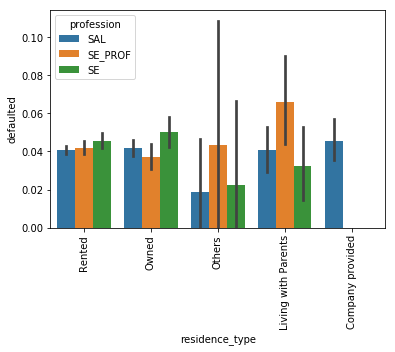

In [332]:
bp = sns.barplot(x='residence_type', y='defaulted', hue='profession', data=credx_df)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

#### No of dependents + Marital Status

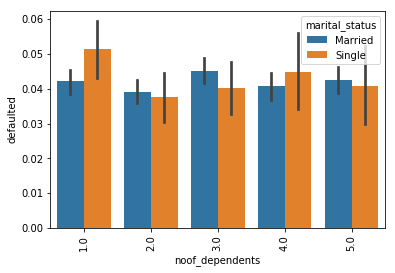

In [333]:
bp = sns.barplot(x='noof_dependents', y='defaulted', hue='marital_status', data=credx_df)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

#### Income bin + Marital Status

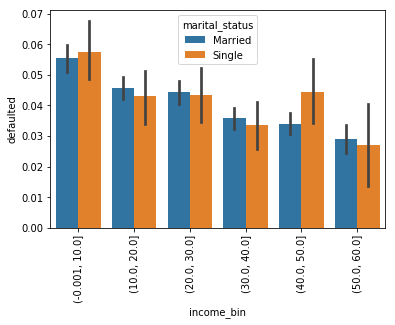

In [334]:
bp = sns.barplot(x='income_bin', y='defaulted', hue='marital_status', data=credx_df)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

There doesn't seems to be much information we could fetch here relating two variables with the default rate. Let's prepare out dataset to go for the further analysis.

In [335]:
# drop the bin columns from the dataframe
credx_df.drop(columns=['age_bin', 'income_bin', 'residence_bin', 'employment_bin', 'ccutil_bin', 'obal_bin', 'trades_bin'], inplace=True)

In [336]:
# checking the NULL values
credx_df.isnull().sum()

application_id                         0
age                                    0
gender                                 0
marital_status                         0
noof_dependents                        0
income                                 0
education                            119
profession                             0
residence_type                         0
noof_months_in_current_residence       0
noof_months_in_current_company         0
90DPD_6months                          0
60DPD_6months                          0
30DPD_6months                          0
90DPD_12months                         0
60DPD_12months                         0
30DPD_12months                         0
avg_ccutil_12months                 1058
trades_opened_6months                  0
trades_opened_12months                 0
PLtrades_opened_6months                0
PLtrades_opened_12months               0
inquiries_6months                      0
inquiries_12months                     0
open_homeloan   

In [337]:
# checking the NULL values in other columns against the rejected candidates
credx_df[credx_df['defaulted'].isnull()].isnull().sum()

application_id                         0
age                                    0
gender                                 0
marital_status                         0
noof_dependents                        0
income                                 0
education                              1
profession                             0
residence_type                         0
noof_months_in_current_residence       0
noof_months_in_current_company         0
90DPD_6months                          0
60DPD_6months                          0
30DPD_6months                          0
90DPD_12months                         0
60DPD_12months                         0
30DPD_12months                         0
avg_ccutil_12months                   35
trades_opened_6months                  0
trades_opened_12months                 0
PLtrades_opened_6months                0
PLtrades_opened_12months               0
inquiries_6months                      0
inquiries_12months                     0
open_homeloan   

In [338]:
# securing the rejected candidates' data
credx_df[credx_df['defaulted'].isnull()].to_csv('rejects.csv', index=False)

In [339]:
# dropping the rows with missing value of the dependant variable
credx_df.drop(credx_df[credx_df['defaulted'].isnull()].index, inplace=True)
credx_df.head()

,application_id,age,gender,marital_status,noof_dependents,income,education,profession,residence_type,noof_months_in_current_residence,...,trades_opened_12months,PLtrades_opened_6months,PLtrades_opened_12months,inquiries_6months,inquiries_12months,open_homeloan,outstanding_balance,total_trades,open_autoloan,defaulted
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,...,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,...,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,...,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,...,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,...,1,0,0,0,0,1.0,3014283.0,4,0,0.0


In [340]:
# checking the NULL values
credx_df.isnull().sum()

application_id                         0
age                                    0
gender                                 0
marital_status                         0
noof_dependents                        0
income                                 0
education                            118
profession                             0
residence_type                         0
noof_months_in_current_residence       0
noof_months_in_current_company         0
90DPD_6months                          0
60DPD_6months                          0
30DPD_6months                          0
90DPD_12months                         0
60DPD_12months                         0
30DPD_12months                         0
avg_ccutil_12months                 1023
trades_opened_6months                  0
trades_opened_12months                 0
PLtrades_opened_6months                0
PLtrades_opened_12months               0
inquiries_6months                      0
inquiries_12months                     0
open_homeloan   

In [341]:
# replacing the NULL values in the categorical columns(education & open_homeloan) with dummy value 10
credx_df['education'].fillna('10', inplace=True)
credx_df['open_homeloan'].fillna(10, inplace=True)

In [342]:
# converting the datatype from float to int
credx_df = credx_df.astype({'open_homeloan': int})

So, we now only have NULL values in 4 columns, which could well be taken care of by WOE.

## WOE & IV analysis

In [343]:
# function to calculate IV and WOE
def iv_woe_func(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    ivDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x, edge = pd.qcut(data[ivars], bins, retbins=True, duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'x1': binned_x.map(lambda i: i.right), 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'x1': data[ivars], 'y': data[target]})
        d = d0.groupby(["x", "x1"], as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'Maxval', 'N', 'Events']
        d['Events_Rate'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['Non-Events_Rate'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['Events_Rate']/d['Non-Events_Rate'])
        d['IV'] = d['WoE'] * (d['Events_Rate'] - d['Non-Events_Rate'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        ivDF=pd.concat([ivDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return ivDF, woeDF

In [344]:
# deriving the WOE and IV values for our dataset
credx_iv, credx_woe = iv_woe_func(data=credx_df, target='defaulted', bins=10, show_woe=True)

Information value of application_id is 0.00148
         Variable                       Cutoff        Maxval     N  Events  \
0  application_id     (100449.999, 99488056.4]  9.948806e+07  6987   292.0   
1  application_id    (99488056.4, 199459947.4]  1.994599e+08  6986   276.0   
2  application_id   (199459947.4, 298561024.0]  2.985610e+08  6986   305.0   
3  application_id   (298561024.0, 399368856.6]  3.993689e+08  6987   295.0   
4  application_id   (399368856.6, 497955643.5]  4.979556e+08  6986   312.0   
5  application_id   (497955643.5, 599089634.8]  5.990896e+08  6986   281.0   
6  application_id   (599089634.8, 699936204.5]  6.999362e+08  6987   297.0   
7  application_id   (699936204.5, 798890993.6]  7.988910e+08  6986   305.0   
8  application_id   (798890993.6, 899547674.7]  8.995477e+08  6986   285.0   
9  application_id  (899547674.7, 1000084142.0]  1.000084e+09  6987   299.0   

   Events_Rate  Non-Events  Non-Events_Rate       WoE            IV  
0     0.099084      6695

Information value of noof_months_in_current_residence is 0.070716
                           Variable         Cutoff Maxval      N  Events  \
0  noof_months_in_current_residence  (5.999, 10.0]   10.0  35079  1160.0   
1  noof_months_in_current_residence   (10.0, 29.0]   29.0   6922   457.0   
2  noof_months_in_current_residence   (29.0, 50.0]   50.0   7162   403.0   
3  noof_months_in_current_residence   (50.0, 73.0]   73.0   6937   329.0   
4  noof_months_in_current_residence   (73.0, 98.0]   98.0   6924   328.0   
5  noof_months_in_current_residence  (98.0, 126.0]  126.0   6840   270.0   

   Events_Rate  Non-Events  Non-Events_Rate       WoE        IV  
0     0.393621     33919.0         0.506882 -0.252890  0.028643  
1     0.155073      6465.0         0.096612  0.473190  0.027663  
2     0.136749      6759.0         0.101006  0.302972  0.010829  
3     0.111639      6608.0         0.098749  0.122687  0.001581  
4     0.111300      6596.0         0.098570  0.121460  0.001546  
5    

              Variable         Cutoff Maxval     N  Events  Events_Rate  \
0  avg_ccutil_12months  (-0.001, 5.0]    5.0  8021   145.0     0.050017   
1  avg_ccutil_12months     (5.0, 7.0]    7.0  6358   126.0     0.043463   
2  avg_ccutil_12months     (7.0, 9.0]    9.0  6967   145.0     0.050017   
3  avg_ccutil_12months    (9.0, 12.0]   12.0  8677   203.0     0.070024   
4  avg_ccutil_12months   (12.0, 15.0]   15.0  5528   156.0     0.053812   
5  avg_ccutil_12months   (15.0, 22.0]   22.0  5939   256.0     0.088306   
6  avg_ccutil_12months   (22.0, 38.0]   38.0  6994   474.0     0.163505   
7  avg_ccutil_12months   (38.0, 52.0]   52.0  6710   486.0     0.167644   
8  avg_ccutil_12months   (52.0, 72.0]   72.0  6846   504.0     0.173853   
9  avg_ccutil_12months  (72.0, 113.0]  113.0  6801   404.0     0.139358   

   Non-Events  Non-Events_Rate       WoE        IV  
0      7876.0         0.119438 -0.870432  0.060426  
1      6232.0         0.094507 -0.776761  0.039649  
2      6822.0  

Information value of outstanding_balance is 0.246663
              Variable                  Cutoff     Maxval     N  Events  \
0  outstanding_balance        (-0.001, 6847.1]     6847.1  6960   139.0   
1  outstanding_balance       (6847.1, 25529.6]    25529.6  6959   120.0   
2  outstanding_balance     (25529.6, 386849.3]   386849.3  6959   258.0   
3  outstanding_balance    (386849.3, 585455.8]   585455.8  6959   374.0   
4  outstanding_balance    (585455.8, 774242.0]   774242.0  6959   451.0   
5  outstanding_balance    (774242.0, 972469.4]   972469.4  6959   443.0   
6  outstanding_balance   (972469.4, 1357433.7]  1357433.7  6959   431.0   
7  outstanding_balance  (1357433.7, 2961006.6]  2961006.6  6959   203.0   
8  outstanding_balance  (2961006.6, 3282399.5]  3282399.5  6959   131.0   
9  outstanding_balance  (3282399.5, 5218801.0]  5218801.0  6960   389.0   

   Events_Rate  Non-Events  Non-Events_Rate       WoE        IV  
0     0.047295      6821.0         0.102336 -0.771857  

Therefore, we now have WOE values for the NULLs in two of the variables; also for the remaining two continous variables(avg_ccutil_12months & outstanding_balance) with NULL values, let's calculate the WOEs.

In [345]:
# calculating WOE for avg_ccutil_12months column's NULL values
n = credx_df['avg_ccutil_12months'].isnull().sum()
events = credx_df.loc[credx_df['avg_ccutil_12months'].isnull(), ['defaulted']].sum()
non_events = n - events
total_events = credx_df['defaulted'].sum()
total_non_events = credx_df.loc[credx_df['defaulted']==0, ['defaulted']].count()
event_rate = np.maximum(events, 0.5) / total_events
non_events_rate = np.maximum(non_events, 0.5) / total_non_events
woe = np.log(event_rate/non_events_rate)

print(woe)

defaulted    0.111429
dtype: float64


In [346]:
# calculating WOE for outstanding_balance column's NULL values
n = credx_df['outstanding_balance'].isnull().sum()
events = credx_df.loc[credx_df['outstanding_balance'].isnull(), ['defaulted']].sum()
non_events = n - events
total_events = credx_df['defaulted'].sum()
total_non_events = credx_df.loc[credx_df['defaulted']==0, ['defaulted']].count()
event_rate = np.maximum(events, 0.5) / total_events
non_events_rate = np.maximum(non_events, 0.5) / total_non_events
woe = np.log(event_rate/non_events_rate)

print(woe)

defaulted   -0.373842
dtype: float64


In [347]:
credx_iv.sort_values('IV')

,Variable,IV
0,marital_status,0.000096
0,gender,0.000326
0,education,0.000783
0,residence_type,0.000925
0,application_id,0.001480
0,open_autoloan,0.001655
0,profession,0.002228
0,noof_dependents,0.002647
0,age,0.004142
0,open_homeloan,0.017627


As we can see from above IV table, following is the predictive power description for each column.

| Predictive Power | Variable Names |
| --------------   | -------------- |
| **Useless for Prediction**      | *marital_status, gender, education, residence_type, application_id, open_autoloan, profession, noof_dependents, age, open_homeloan*   |
| **Weak Predictors**   | *noof_months_in_current_company, income, noof_months_in_current_residence*  |
| **Medium Predictors**   | *inquiries_6months, 90DPD_6months, trades_opened_6months, 60DPD_12months, 60DPD_6months, 90DPD_12months, 30DPD_12months, PLtrades_opened_6months, total_trades, outstanding_balance, 30DPD_6months, inquiries_12months, PLtrades_opened_12months, trades_opened_12months*  |
| **Strong Predictors**   | *avg_ccutil_12months*  |

That is, 13 out of the 28 independent variables are too low in terms of their predictive power, one(`application_id`) out of which is very obvious though.

In [348]:
credx_woe.head()

,Variable,Cutoff,Maxval,N,Events,Events_Rate,Non-Events,Non-Events_Rate,WoE,IV
0,application_id,"(100449.999, 99488056.4]",9.94881e+07,6987,292.0,0.099084,6695.0,0.100049,-0.009697,9.362571e-06
1,application_id,"(99488056.4, 199459947.4]",1.9946e+08,6986,276.0,0.093655,6710.0,0.100273,-0.068288,4.519922e-04
2,application_id,"(199459947.4, 298561024.0]",2.98561e+08,6986,305.0,0.103495,6681.0,0.099840,0.035954,1.314117e-04
3,application_id,"(298561024.0, 399368856.6]",3.99369e+08,6987,295.0,0.100102,6692.0,0.100004,0.000973,9.465233e-08
4,application_id,"(399368856.6, 497955643.5]",4.97956e+08,6986,312.0,0.105870,6674.0,0.099735,0.059694,3.662149e-04


Now, looking above on the Predictive power of the variables from the IV table, let's list the variables whose IV value is below 0.1

In [349]:
# fetching the variables with low predictive power
bad_preds = credx_iv.loc[credx_iv['IV']<0.1, ['Variable']].values.tolist()
bad_preds = np.concatenate(bad_preds, axis=0)
bad_preds

array(['application_id', 'age', 'gender', 'marital_status',
       'noof_dependents', 'income', 'education', 'profession',
       'residence_type', 'noof_months_in_current_residence',
       'noof_months_in_current_company', 'open_homeloan', 'open_autoloan'],
      dtype='<U32')

In [350]:
# fetching the list of variables to be transformed
trans_var_list = credx_df.columns.difference(['defaulted'])

trans_var_list

Index(['30DPD_12months', '30DPD_6months', '60DPD_12months', '60DPD_6months',
       '90DPD_12months', '90DPD_6months', 'PLtrades_opened_12months',
       'PLtrades_opened_6months', 'age', 'application_id',
       'avg_ccutil_12months', 'education', 'gender', 'income',
       'inquiries_12months', 'inquiries_6months', 'marital_status',
       'noof_dependents', 'noof_months_in_current_company',
       'noof_months_in_current_residence', 'open_autoloan', 'open_homeloan',
       'outstanding_balance', 'profession', 'residence_type', 'total_trades',
       'trades_opened_12months', 'trades_opened_6months'],
      dtype='object')

In [351]:
# creating an empty dataframe for woe values imputed
credx_woe_df = pd.DataFrame()

# imputing the woe values with the resultant dataframe into a new dataframe
for var in trans_var_list:
    small_credx_df = credx_woe[credx_woe['Variable'] == var]
    trans_dict = dict(zip(small_credx_df.Maxval,small_credx_df.WoE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(trans_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            credx_woe_df[var] = credx_df[var].apply(lambda x: eval(replace_cmd))
        except:
            credx_woe_df[var] = credx_df[var].apply(lambda x: eval(replace_cmd1))

In [352]:
# checking the resultant dataframe
credx_woe_df.head()

,30DPD_12months,30DPD_6months,60DPD_12months,60DPD_6months,90DPD_12months,90DPD_6months,PLtrades_opened_12months,PLtrades_opened_6months,age,application_id,...,noof_months_in_current_company,noof_months_in_current_residence,open_autoloan,open_homeloan,outstanding_balance,profession,residence_type,total_trades,trades_opened_12months,trades_opened_6months
0,-0.376395,-0.386796,-0.351921,-0.336371,-0.356637,-0.260685,-0.686488,-0.649191,0.032840,0.015039,...,-0.228795,-0.069182,0.011973,-0.236703,-0.832159,-0.028375,-0.004479,-0.447897,-0.816404,-0.543248
1,-0.376395,-0.386796,-0.351921,-0.336371,-0.356637,-0.260685,-0.686488,-0.649191,-0.016278,0.059694,...,-0.149320,-0.069182,0.011973,0.073722,-0.771857,-0.013343,-0.004479,-0.048845,-0.816404,-0.543248
2,-0.376395,-0.386796,-0.351921,-0.336371,-0.356637,-0.260685,-0.686488,-0.649191,0.031623,0.015039,...,-0.254889,-0.069182,0.011973,-0.236703,-0.832159,-0.013343,-0.004479,-0.877731,-0.893936,-0.543248
3,-0.376395,-0.386796,-0.351921,-0.336371,-0.356637,-0.260685,-0.686488,-0.649191,-0.044690,0.000973,...,-0.254889,0.121460,-0.138237,-0.236703,0.294589,0.091379,-0.004479,-0.447897,-0.893936,-0.543248
4,-0.376395,-0.386796,-0.351921,-0.336371,-0.356637,-0.260685,-0.686488,-0.649191,0.031623,-0.068288,...,-0.149320,-0.069182,0.011973,-0.236703,-0.832159,-0.028375,-0.004479,-0.447897,-0.893936,-0.543248


In [353]:
# checking the non-zero values in the woe dataframe
credx_woe_df.astype(bool).sum(axis=0)

30DPD_12months                      69864
30DPD_6months                       69864
60DPD_12months                      69864
60DPD_6months                       69864
90DPD_12months                      69864
90DPD_6months                       69864
PLtrades_opened_12months            69864
PLtrades_opened_6months             69864
age                                 69864
application_id                      69864
avg_ccutil_12months                 68841
education                           69864
gender                              69864
income                              69864
inquiries_12months                  69864
inquiries_6months                   69864
marital_status                      69864
noof_dependents                     69864
noof_months_in_current_company      69864
noof_months_in_current_residence    69864
open_autoloan                       69864
open_homeloan                       69864
outstanding_balance                 69592
profession                        

And as expecteded, we can clearly see that all our NULL values in the two columns are intact and converted to zeros. Let's impute them with their respective woe values.

In [354]:
# imputing the zeros(actually NULLs) in avg_ccutil_12months and outstanding_balance with their woe values
credx_woe_df.loc[credx_woe_df['avg_ccutil_12months']==0, ['avg_ccutil_12months']] = 0.111429
credx_woe_df.loc[credx_woe_df['outstanding_balance']==0, ['outstanding_balance']] = -0.373842

In [355]:
# checking the non-zero values in the woe dataframe
credx_woe_df.astype(bool).sum(axis=0)

30DPD_12months                      69864
30DPD_6months                       69864
60DPD_12months                      69864
60DPD_6months                       69864
90DPD_12months                      69864
90DPD_6months                       69864
PLtrades_opened_12months            69864
PLtrades_opened_6months             69864
age                                 69864
application_id                      69864
avg_ccutil_12months                 69864
education                           69864
gender                              69864
income                              69864
inquiries_12months                  69864
inquiries_6months                   69864
marital_status                      69864
noof_dependents                     69864
noof_months_in_current_company      69864
noof_months_in_current_residence    69864
open_autoloan                       69864
open_homeloan                       69864
outstanding_balance                 69864
profession                        

In [356]:
# removing the application_id column from the dataset
credx_woe_df.drop(['application_id'], axis=1, inplace=True)

## Model Building


### Using Demographic Data Only

Let's start with the Demographic data, we will try to create a model form the Demographic data only to get an idea on the predictive power of the demographic data.

In [357]:
# fetching the demographc data from the combined woe dataframe
demog_woe_df = credx_woe_df[['age', 'education', 'gender', 'income', 'marital_status', 'noof_dependents', 'noof_months_in_current_company', 'noof_months_in_current_residence', 'profession', 'residence_type']]

demog_woe_df.head()

,age,education,gender,income,marital_status,noof_dependents,noof_months_in_current_company,noof_months_in_current_residence,profession,residence_type
0,0.032840,0.017390,0.032129,-0.272909,-0.004102,-0.085198,-0.228795,-0.069182,-0.028375,-0.004479
1,-0.016278,-0.017933,-0.010133,-0.385540,-0.004102,-0.025162,-0.149320,-0.069182,-0.013343,-0.004479
2,0.031623,0.017390,-0.010133,-0.169391,0.023383,-0.085198,-0.254889,-0.069182,-0.013343,-0.004479
3,-0.044690,0.017390,-0.010133,-0.385540,-0.004102,0.040040,-0.254889,0.121460,0.091379,-0.004479
4,0.031623,-0.017933,0.032129,-0.169391,-0.004102,0.004346,-0.149320,-0.069182,-0.028375,-0.004479


#### Test-Train Split

In [358]:
# Import library to split the dataset
from sklearn.model_selection import train_test_split

demog_train, demog_test, default_train, default_test = train_test_split(demog_woe_df, credx_df['defaulted'], train_size=0.7, test_size=0.3, random_state=100)

#### Logistic Regression

In [359]:
# Importing from the sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm

In [360]:
# Fitting the model
logitreg = LogisticRegression(class_weight='balanced')
logitreg.fit(demog_train, default_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [361]:
# Logistic regression model
logitmod1 = sm.GLM(default_train,(sm.add_constant(demog_train)), family = sm.families.Binomial())
logitmod1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              defaulted   No. Observations:                48904
Model:                            GLM   Df Residuals:                    48893
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8433.7
Date:                Sat, 21 Dec 2019   Deviance:                       16867.
Time:                        14:40:51   Pearson chi2:                 4.90e+04
No. Iterations:                     6   Covariance Type:             nonrobust
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -3.1216      0.023   -136.784      0.000      -3.166      -3.077
age                                  0.8233      0.358      2.298      0.022       0.121       1.525
education                            0.6663      0.765      0.871      0.384      -0.833       2.166
gender                               1.1840      1.243      0.953      0.341      -1.252       3.620
income                               0.8199      0.110      7.427      0.000       0.604       1.036
marital_status                      -0.2807      2.305     -0.122      0.903      -4.798       4.237
noof_dependents                      0.5857      0.440      1.332      0.183      -0.276       1.448
noof_months_in_current_company       0.8963      0.151      5.925      0.000       0.600       1.193
noof_months_in_current_residence     0.8580      0.084     10.247      0.000       0.694       1.022
profession                           0.7848      0.473      1.661      0.097      -0.141       1.711
residence_type                       0.2629      0.727      0.362      0.718      -1.162       1.688
====================================================================================================
"""

let's remove the columns with very high P values `marital_status` and `residence_type`

In [362]:
# removing variables with high P values
demog_train.drop(['marital_status', 'residence_type'], axis=1, inplace=True)

In [363]:
logitmod2 = sm.GLM(default_train,(sm.add_constant(demog_train)), family = sm.families.Binomial())
logitmod2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              defaulted   No. Observations:                48904
Model:                            GLM   Df Residuals:                    48895
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8433.8
Date:                Sat, 21 Dec 2019   Deviance:                       16868.
Time:                        14:40:57   Pearson chi2:                 4.90e+04
No. Iterations:                     6   Covariance Type:             nonrobust
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -3.1216      0.023   -136.789      0.000      -3.166      -3.077
age                                  0.8205      0.358      2.293      0.022       0.119       1.522
education                            0.6685      0.765      0.874      0.382      -0.831       2.168
gender                               1.1830      1.243      0.952      0.341      -1.253       3.619
income                               0.8202      0.110      7.432      0.000       0.604       1.036
noof_dependents                      0.5864      0.440      1.333      0.182      -0.275       1.448
noof_months_in_current_company       0.8965      0.151      5.927      0.000       0.600       1.193
noof_months_in_current_residence     0.8580      0.084     10.248      0.000       0.694       1.022
profession                           0.7774      0.472      1.647      0.100      -0.148       1.703
====================================================================================================
"""

#### PCA

In [364]:
# adding further required libraries
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [365]:
pca = PCA()
pca.fit(demog_train)
demog_pca = pca.fit_transform(demog_train)

In [366]:
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0     47.70
1     76.79
2     92.94
3     95.90
4     97.77
5     99.28
6     99.77
7    100.00
dtype: float64


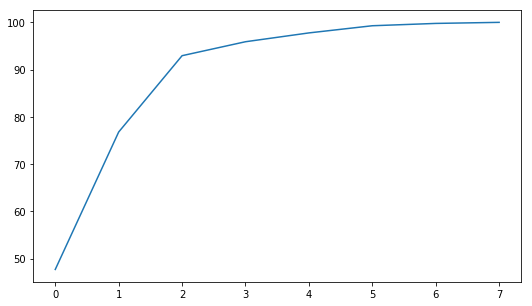

In [367]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20))
plt.plot(cumulative_variance)

As it is quite visible that over `95%` variance can be captured by 4 variables.

In [368]:
# create pipeline
PCA_VAR = 4
steps = [("pca", PCA(n_components=PCA_VAR)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [369]:
# fit model
pipeline.fit(demog_train, default_train)

# check score on train data
pipeline.score(demog_train, default_train)

0.5923237362996892

This is clearly an extremely bad score for a model, let's check how it performs on the test data.

In [370]:
# removing bad columns from the training data
demog_test.drop(['marital_status', 'residence_type'], axis=1, inplace=True)

In [371]:
# predicting default on test data
default_pred = pipeline.predict(demog_test)

# create confusion matrix
cm = confusion_matrix(default_test, default_pred)
print(cm)

# checking sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(default_test, default_pred, average='binary')
print("Sensitivity:  ", round(sensitivity, 2), "\n", "Specificity:  ", round(specificity, 2), sep='')

# checking the area under curve(AUC)
default_pred_prob = pipeline.predict_proba(demog_test)[:, 1]
print("AUC:     ", round(roc_auc_score(default_test, default_pred_prob),2))

[[12012  8065]
 [  388   495]]
Sensitivity:  0.56
Specificity:  0.6
AUC:      0.61


As expected, the model is equally bad on the test data as well. Let's see how a Random Forest performs on the dataset.

#### Random Forest Classifier

In [372]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

# fit the model
rfc.fit(demog_train, default_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [373]:
# predict churn on test data
default_pred = rfc.predict(demog_test)

# checking report of the default model
print(classification_report(default_test,default_pred))

# printing confusion matrix
print(confusion_matrix(default_test,default_pred))

# accuracy score
print(accuracy_score(default_test,default_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     20077
         1.0       0.09      0.01      0.02       883

   micro avg       0.95      0.95      0.95     20960
   macro avg       0.52      0.50      0.50     20960
weighted avg       0.92      0.95      0.94     20960

[[19971   106]
 [  873    10]]
0.9532919847328244


In [374]:
# area under the curve
print("AUC:     ", round(roc_auc_score(default_test, default_pred),2))

AUC:      0.5


In [384]:
sensitivity, specificity, _ = sensitivity_specificity_support(default_test, default_pred, average='binary')
print("Sensitivity:  ", round(sensitivity, 2), "\n", "Specificity:  ", round(specificity, 2), sep='')

Sensitivity:  0.01
Specificity:  0.99


As this is very clear now from the above result, while `accuracy score is 95% but out of 883 defaulters only 10 were predicted correctly`. On the other hand, AUC score is as bad as it was for Logistic Regression model. 

**Based on the above models' output and the EDA insights and IV values, we can very confidently conclude that the application data is very bad in terms of predictive power.**

To start with the combined dataset, let's first do some **feature elimination using the results from IV table and get rid of the useless predictors.**

In [375]:
# fetching final dataframe after removing the variables with below 0.1 IV values
pd.concat([credx_woe_df[credx_woe_df.columns.difference(bad_preds)], pd.DataFrame(credx_df['defaulted'])], axis=1).to_csv('credx_final.csv', index=False)

In [376]:
# exporting the woe values for further use 
credx_woe.to_csv('credx_woe.csv', index=False)

In [383]:
# exporting the raw data for the financial analysis
credx_df.loc[:, ['90DPD_12months', '60DPD_12months', '30DPD_12months', 'outstanding_balance', 'defaulted']].to_csv('credx_finance.csv', index=False)

Now that we have the final dataset to do our modeling on, let's start with our modelling excercise in next workbook.